In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cavsim
from cavsim import Measure
from cavsim.connectors import BaseConnector, Connector
from cavsim.channels import ImportChannel, ExportChannel
from cavsim.components import BaseComponent, Component
from cavsim.solvers import BaseSolver, SimpleSolver
from cavsim.fluids import Fluid

In [3]:
from cavsim.pipes.pipe_with_space_interpolation_diesselhorst import Pipe
from cavsim.pipes.two_phase_pipe import Pipe as Pipe2
from cavsim.boundaries.left_boundary_pressure import LeftBoundaryPressure
from cavsim.boundaries.left_boundary_velocity import LeftBoundaryVelocity
from cavsim.boundaries.right_boundary_pressure import RightBoundaryPressure
from cavsim.boundaries.right_boundary_velocity import RightBoundaryVelocity
from cavsim.boundaries.simple_pipe_connector import PipeConnectorSimple
from cavsim.boundaries.zeta_joint import ZetaJoint
from cavsim.boundaries.simple_t_joint import SimpleTJoint
from cavsim.boundaries.simple_right_gasdampener import RightGasBubbleSimple
from cavsim.boundaries.simple_left_gasdampener import LeftGasBubbleSimple
from cavsim.boundaries.frictionless_gasdampener import FrictionlessGasDampener
from cavsim.boundaries.gasdampener import GasDampener
from cavsim.boundaries.pump_suction_valve import PumpSuctionValve
from cavsim.boundaries.pump_discharge_valve import PumpDischargeValve
from cavsim.boundaries.reflectionless_right_boundary_condition import RightBoundaryReflectionFree
from cavsim.boundaries.reflectionless_left_boundary_condition import LeftBoundaryReflectionFree
from cavsim.boundaries.piston_boundary import PumpBoundary as Piston

In [4]:
fluid = Fluid(1000, 1e-3, 2.08e9, 2.3e3,initial_pressure=128000)
discharge_pressure = 24e5

In [5]:
Tank = Pipe(1.5, 0.5, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction = Pipe(0.108, 0.3, 0.005, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction1 = Pipe(0.056, 1.580, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction2 = Pipe(0.056, 1.290, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction3 = Pipe(0.056, 0.270, 0.102, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction4 = Pipe(0.056, 1.810, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction5 = Pipe(0.056, 0.230, 0.002, 2e11, 1e-4, 4, initial_pressure=1.28e5)
suction6 = Pipe(0.056, 0.1, 0.012, 2e11, 1e-4, 4, initial_pressure=1.28e5)
pump1 = Pipe(0.032, 0.1, 0.01, 2e11, 1e-4, 4, initial_pressure=1.28e5)
pump2 = Piston(0.07, 0.09, 0.102, 2e11, 1e-4, 8, initial_pressure=1.28e5, rpm=180, radius=0.0225, rod_ratio=0.175, phase_angle=np.pi)
pump3 = Pipe(0.032, 0.1, 0.01, 2e11, 1e-4, 4, initial_pressure=1.28e5)

In [6]:
lb1 = LeftBoundaryPressure(1.28e5)
lb1.connect(suction)

In [7]:
conn = ZetaJoint(3.0, initial_pressure=1.28e5)
suction.connect(conn)
suction1.connect(conn)

In [8]:
conn1 = ZetaJoint(0.1, initial_pressure=1.28e5)
suction1.connect(conn1)
suction2.connect(conn1)

In [9]:
conn2 = ZetaJoint(0.1, initial_pressure=1.28e5)
suction2.connect(conn2)
suction3.connect(conn2)

In [10]:
conn3 = ZetaJoint(0.1, initial_pressure=1.28e5)
suction3.connect(conn3)
suction4.connect(conn3)

In [11]:
conn4 = ZetaJoint(0.1, initial_pressure=1.28e5)
suction4.connect(conn4)
suction5.connect(conn4)

In [12]:
conn5 = ZetaJoint(0.1, initial_pressure=1.28e5)
suction5.connect(conn5)
suction6.connect(conn5)

In [13]:
conn6 = ZetaJoint(0.1, initial_pressure=1.28e5)
suction6.connect(conn6)
pump1.connect(conn6)

In [14]:
tjoint = SimpleTJoint(initial_pressure=1.28e5)
pump1.connect(tjoint.left)
pump2.connect(tjoint.right)
pump3.connect(tjoint.right2)

In [15]:
def pump(time):
    
    radius = 0.0225
    rratio = 0.0187
    d = 0.07
    rpm = 180
    #rpm = 135.87
    omega = rpm / 60 * 2* np.pi
    phi0 = np.pi 
    
    result = (radius * omega
                  * (np.sin(omega * time + phi0)
                     - rratio / 2.0 * np.sin(2.0 * (omega * time + phi0))))
    #result = 0.1
    
    return result

In [16]:
pb = RightBoundaryVelocity(0.0, 1.28e5)
pb.connect(pump3)

In [17]:
#rb = RightBoundaryVelocity(pump, 1.28e5)

In [18]:
#rb.connect(pump2)

In [19]:
plogs1 = []
plogs2 = []
plogs3 = []
vlogs = []
poslog = []
posalog = []
posblog = []
dislog = []
dxalog = []
dxblog = []

def logging(time):
    plogs1.append(suction5.field_wide_slice('pressure', 0) + 0.0)
    plogs2.append(pump2._number_of_points)
    plogs3.append(suction6.field_wide_slice('velocity', 0) + 0.0)
    poslog.append(pump2.field_slice('x_x', 0) + 0.0)
    posalog.append(pump2.field_slice('x_a', 1) + 0.0)
    posblog.append(pump2.field_slice('x_b', 1) + 0.0)
    dxalog.append(pump2.field_slice('delta_x_a', 1) + 0.0)
    dxblog.append(pump2.field_slice('delta_x_b', 1) + 0.0)
    dislog.append(pump2._number_of_points)
    #vlogs.append(pipe2.field_wide_slice('velocity', 0) + 0.0)

In [20]:
solver = SimpleSolver()
solver.fluid = fluid
solver.seeds = [suction]#, pipe2]#, discharge, discharge15, discharge2]
solver._callback = logging

In [21]:
solver.solve(1e20, 0.35, 3)

 0:00:00 [                              |  0.05%]  0:05:25  Currently at time   0.000 of   0.350

c:\cavsim\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (4.160251471689218e-05 < 1e+20 by <cavsim.pipes.pipe_with_space_interpolation_diesselhorst.Pipe object at 0x000001970A9F7B08>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
c:\cavsim\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (0.0002191065775089655 < 1e+20 by <cavsim.pipes.pipe_with_space_interpolation_diesselhorst.Pipe object at 0x000001970A9E29C8>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
c:\cavsim\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (0.0001788908132826364 < 1e+20 by <cavsim.pipes.pipe_with_space_interpolation_diesselhorst.Pipe object at 0x000001970A9E49C8>)
  warn('Smaller timestep required by component! ({} < {} by {})'.for

 0:06:32 [==============================|100.00%]  0:00:00  Currently at time   0.350 of   0.350

In [22]:
pfield1 = np.stack(plogs1)
pfield2 = np.stack(plogs2)
pfield3 = np.stack(plogs3)
posa = np.stack(posalog)
posb = np.stack(posblog)
pos = np.stack(poslog)
log = np.stack(dislog)

NameError: name 'ln3' is not defined

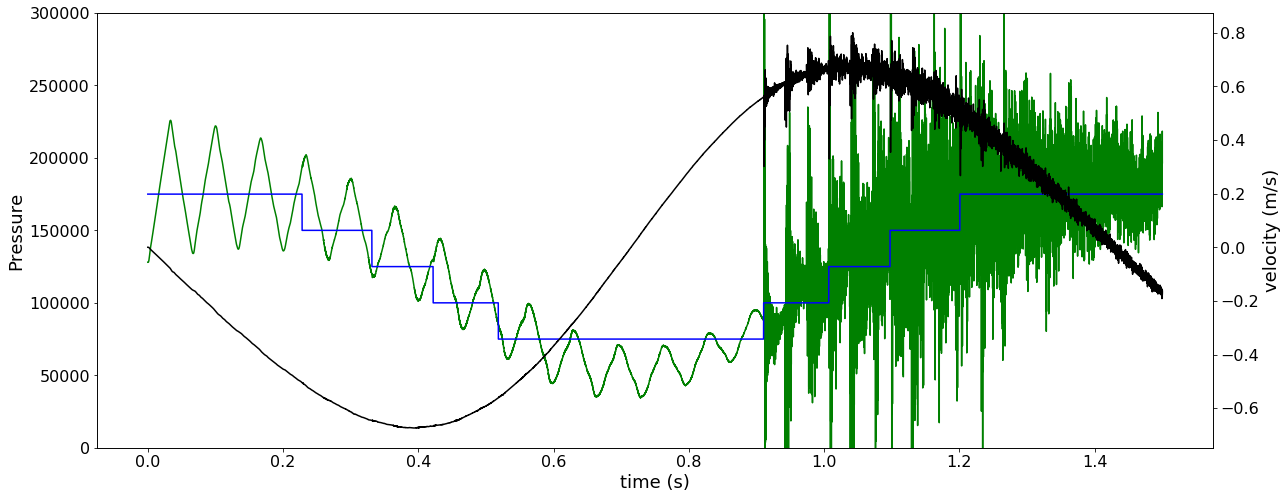

In [23]:
time = np.linspace(0, 1.5, int(pfield1[:,:].shape[0]))
#plt.figure(figsize=(16, 10))
fig, ax1 = plt.subplots(figsize=(20, 8))
#plt.subplot(1, 2, 1)
#plt.plot(vfield[:,0])
#plt.plot(1, 2, 2)
val1 = 0
val = -1
#val1 = 0
#val = -1

#upper_force = upperp_field[val1:val, 0] + gfield[val1:val, 0] + springforce[val1:val, 0]
#lower_force = lowp_field[val1:val, 0] + contact_pressure[val1:val, 0]
#result1 = lower_force - upper_force
#result2 = flow_field[val1:val, 0] - gfield[val1:val, 0] - springforce[val1:val, 0] - dampingfield[val1:val, 0]
#upper_flow = gfield[val1:val, 0] + springforce[val1:val, 0] + dampingfield[val1:val, 0]
#lower_flow = flow_field[val1:val, 0]
#ax1.plot(time[val1:val], upper_flow, color='red')
#ax1.plot(time[val1:val], lower_flow, color='blue')


#plt.subplot(1, 2, 2)
#ax1.plot(result1[val1:val])
#ax1.plot(result2[val1:val])
#ax1.plot(time[val1:val], upperp_field[val1:val, 0], color='red')
#ax1.plot(time[val1:val], lowp_field[val1:val, 0], color='green')
#ax1.plot(time[val1:val], dampingfield[val1:val, 0], color='blue')


#ax1.plot(time[val1:val], spring_force[val1:val, 0], color='grey')
#ax1.plot(time[val1:val], lower_force, color='blue')

#plt.plot(time[val1:val], pfield3[val1:val, 1], color='red')
#plt.plot(time[val1:val], pump_velocity[val1:val, 0], color='black')
ln1 = plt.plot(time[val1:val], pfield1[val1:val, -2], color='green', label='Pipe1 Pressure')
ln2 = plt.plot(time[val1:val], pfield2[val1:val]*0.25*10**5,color='blue', label='Pipe2 Pressure')
#ax1.plot(time[val1:val], velfield[val1:val, 0], color='green')
plt.plot()

#ax1.plot(time[val1:val], deltap[val1:val, 0], color='green')

#plt.xlim(time[val1],time[val])
#plt.ylim(0e5, 22e5)

color = 'tab:red'
ax1.set_xlabel('time (s)', color='black', fontsize='18')
ax1.set_ylabel('Pressure', color='black', fontsize='18')
#ax1.set_ylim(0.0e5, 23e5)
#ax1.set_xlim(0.0, 0.9)
ax1.set_ylim(0e5, 3e5)
#ax1.grid()
#ax1.plot(time[val1:val], pfield1[val1:val, 1], color='red')
#ax1.plot(time[val1:val], pfield2[val1:val, -2], color='green')
ax1.tick_params(axis='y', labelcolor='black', labelsize='16')
ax1.tick_params(axis='x', labelcolor='black', labelsize='16')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

#ax2.plot(time[val1:val], flow_force[val1:val, 0], color='red')
#ax2.plot(time[val1:val], disfield[val1:val, 0]*1000, color='red',label='Discharge valve')  # we already handled the x-label with ax1
#ln3 = ax2.plot(time[val1:val], velocity[val1:val, 0], color='red', label='Pipe2 Velocity')
#ax2.plot(time[val1:val], pfield1[val1:val, 1] - pfield1[val1:val, -2])
ln4 = ax2.plot(time[val1:val], pfield3[val1:val, 0], color = 'black', label='Pipe1 Velocity')
ax2.set_ylabel('velocity (m/s)', color='black', fontsize='18')
ax2.tick_params(axis='y', labelcolor='black', labelsize='16')
#ax2.set_ylim(0.999, 1.001)

lns = ln1 + ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right', frameon=False, fontsize='24')
#plt.ylim(-2e3, 2e3)
fig.tight_layout()
plt.show()

In [ ]:
a = np.linspace(1, 10, 10)
b = [0, 3, 5]
c = a[b]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [ ]:
print(pos[0])
x = np.ones(9)
xa = 2 * np.ones(9)
xb = 3 * np.ones(9)

In [ ]:
%matplotlib
fig, ax = plt.subplots(figsize=(10,10))
def make_frame(t):
    t = int(np.floor(3000 * t))
    ax.clear()
    ax.set_title('Adaptives Netz zur Abbildung der Kolbenbewegung')
    ax.plot(pos[t, :log[t]], x[:log[t]], 'ro')
    ax.plot(posa[t, :log[t]], xa[:log[t]], 'bo')
    ax.plot(posb[t, :log[t]], xb[:log[t]], 'go')
    ax.set_ylim(-0.3,4)
    ax.set_xlim(-0.025,0.1)
    ax.set_xlabel('Weg in Meter')
    ax.set_ylabel('-')
    return mplfig_to_npimage(fig)
animation = VideoClip(make_frame, duration=14)
animation.ipython_display(fps=200, loop=True, autoplay=True)

In [ ]:
#animation.write_videofile("movie.mp4",fps=20)

In [ ]:
dxa = np.stack(dxalog)
dxb = np.stack(dxblog)
for i in range(25):
    #print(posa[i,:log[i]])
    print(dxa[i])

In [ ]:
print(dxa[0])

In [24]:
alpha_g = 343.0
alpha_f = 1484

In [25]:
alpha_mixed = 300

In [27]:
factor1 = alpha_g**2 / alpha_mixed**2
factor2 = 1.3 / 1000